## Reading and Understanding the Data

In [1]:
#importing  the important libraries
import pandas as pd
import numpy as np

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the input data 
df=pd.read_csv('Housing.csv')
#check the data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
#describe the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


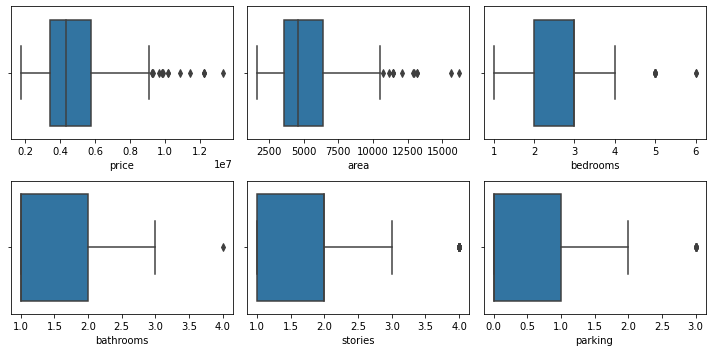

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

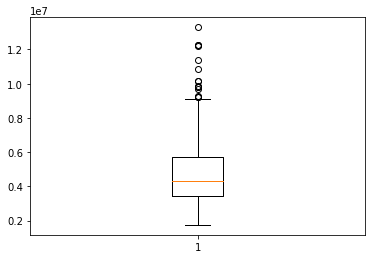

In [8]:
# outlier treatment for price
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

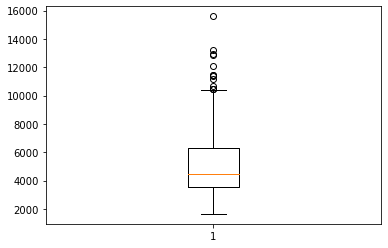

In [9]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

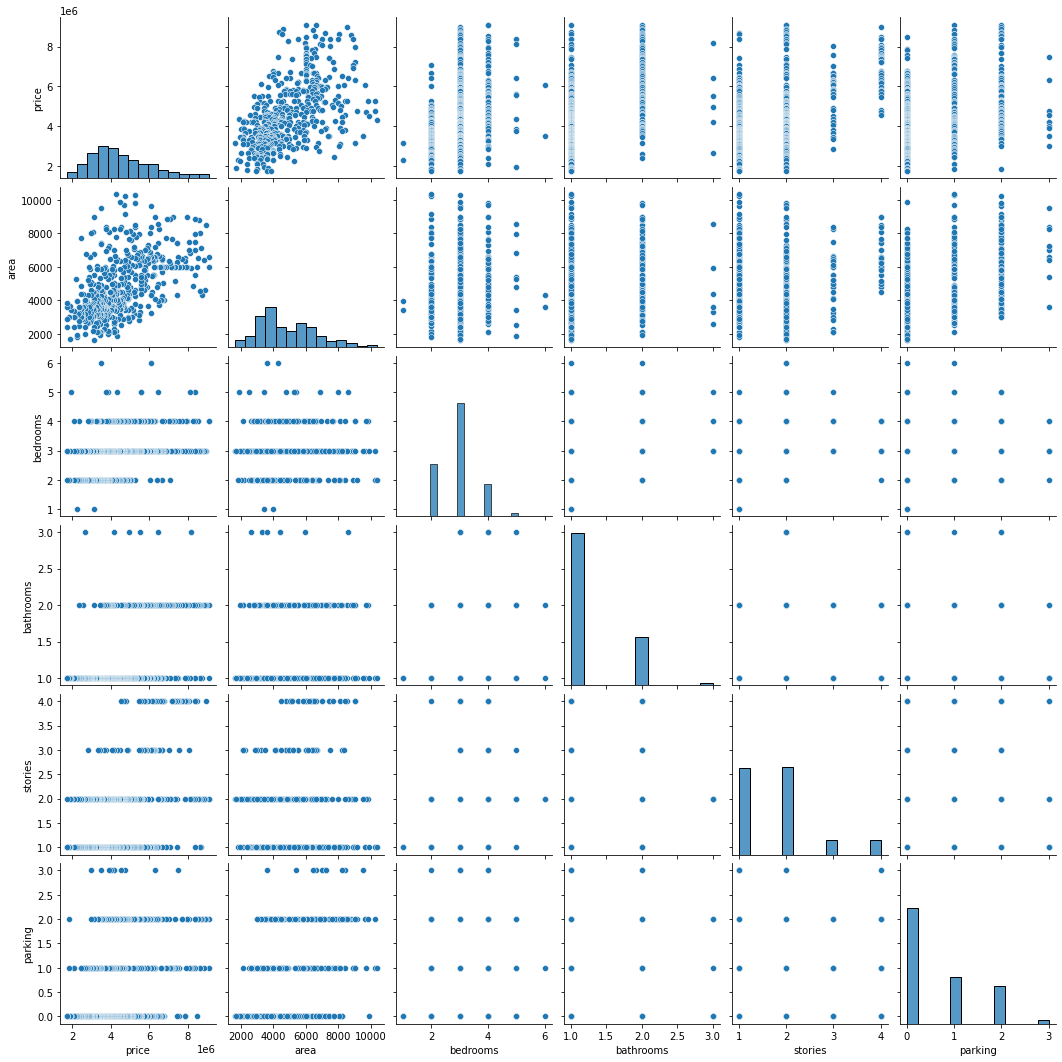

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [14]:
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [15]:
# Add the results to the original housing dataframe

df = pd.concat([df, status], axis = 1)

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [17]:
# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [19]:
#define the input [x] and the output / prediction data
#define the y first 
y=df['price']
# now the input data 
x=df.drop(['price'], axis=1)

In [20]:
x.shape , y.shape

((517, 13), (517,))

In [21]:
x.dtypes

area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
parking            int64
prefarea           int64
semi-furnished     uint8
unfurnished        uint8
dtype: object

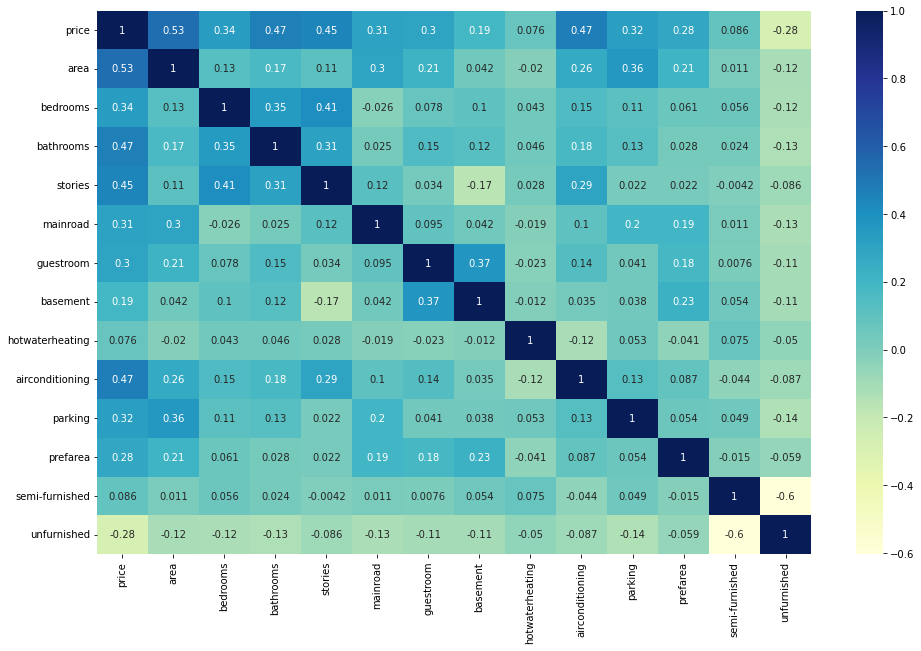

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [23]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.533186,0.335328,0.466483,0.446839,0.307185,0.303994,0.190117,0.075979,0.471706,0.321058,0.280808,0.085766,-0.278463
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.302116,0.213826,0.042227,-0.020489,0.264680,0.357276,0.208014,0.010588,-0.121219
bedrooms,0.335328,0.127745,1.000000,0.346230,0.406684,-0.025775,0.078443,0.102261,0.042953,0.150378,0.105561,0.061014,0.056241,-0.122155
bathrooms,0.466483,0.171528,0.346230,1.000000,0.311314,0.024614,0.152035,0.124691,0.046486,0.175634,0.127102,0.027817,0.024132,-0.129211
stories,0.446839,0.109877,0.406684,0.311314,1.000000,0.120759,0.034301,-0.166031,0.027834,0.293854,0.022043,0.021529,-0.004171,-0.085689
mainroad,0.307185,0.302116,-0.025775,0.024614,0.120759,1.000000,0.095201,0.041789,-0.019471,0.102198,0.195635,0.193613,0.011257,-0.125560
guestroom,0.303994,0.213826,0.078443,0.152035,0.034301,0.095201,1.000000,0.373599,-0.022922,0.139242,0.041133,0.184999,0.007601,-0.108383
basement,0.190117,0.042227,0.102261,0.124691,-0.166031,0.041789,0.373599,1.000000,-0.012428,0.034796,0.038480,0.229180,0.054119,-0.108168
hotwaterheating,0.075979,-0.020489,0.042953,0.046486,0.027834,-0.019471,-0.022922,-0.012428,1.000000,-0.119731,0.052510,-0.041079,0.074875,-0.049550
airconditioning,0.471706,0.264680,0.150378,0.175634,0.293854,0.102198,0.139242,0.034796,-0.119731,1.000000,0.129590,0.087044,-0.043557,-0.086983


In [24]:
#now lets split the data into train and test 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [25]:
#lets check the shape of the data
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((361, 13), (156, 13), (361,), (156,))

In [26]:
#lets scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

x_train[:5] , x_test[:5]

(array([[-0.78572751,  1.43639672, -0.57323771,  0.26295561,  0.42395585,
         -0.4464701 , -0.72333032, -0.21535276, -0.64904533,  1.53367493,
         -0.50346025, -0.83356804, -0.74118569],
        [ 2.21694382,  0.0754014 ,  1.49615042,  0.26295561,  0.42395585,
         -0.4464701 , -0.72333032, -0.21535276,  1.54072443,  1.53367493,
         -0.50346025, -0.83356804, -0.74118569],
        [ 0.60796522,  0.0754014 ,  3.56553856,  0.26295561,  0.42395585,
          2.23979166,  1.38249424, -0.21535276, -0.64904533,  0.37539742,
         -0.50346025, -0.83356804,  1.34918957],
        [-0.71207708,  0.0754014 , -0.57323771,  0.26295561,  0.42395585,
         -0.4464701 , -0.72333032, -0.21535276, -0.64904533,  1.53367493,
         -0.50346025,  1.19966211, -0.74118569],
        [-0.77439667,  0.0754014 , -0.57323771, -0.89469044,  0.42395585,
         -0.4464701 , -0.72333032, -0.21535276, -0.64904533, -0.78288009,
          1.98625413,  1.19966211, -0.74118569]]),
 array([[-1.2

In [27]:
from sklearn.linear_model import Lasso
sk_model = Lasso(alpha=10)

In [28]:
sk_model.fit(x_train, y_train)

Lasso(alpha=10)

In [29]:
sk_model.score(x_train, y_train)*100

65.7661771496161

In [30]:
sk_test_data_prediction = sk_model.predict(x_test)

In [31]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, sk_test_data_prediction)

print("R squared error : ", score_1*100)
print('Mean Absolute Error : ', score_2)

R squared error :  65.66958343457405
Mean Absolute Error :  712079.6632740885


In [32]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [33]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(x_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.98


In [34]:
#predict hp value using lasso regression model
model.predict(x_test)

array([2470318.8540946 , 4215210.44192841, 3854915.52354881,
       3916453.01209303, 5078050.64947196, 2268996.00318325,
       3662946.08906068, 4129739.32668712, 6177775.02227286,
       3855251.68463097, 4112594.20880016, 3371822.35191007,
       3079963.66082446, 5859591.4195754 , 2939754.94552162,
       3034690.55776529, 5924761.35460168, 7109719.49556555,
       5306633.20959246, 2962576.79416949, 3215145.02229969,
       4429550.35479715, 7778099.06836089, 4419483.07325347,
       2571445.57246437, 5244131.07775467, 4441175.58935626,
       7215661.60734932, 3855251.68463097, 4384519.81739528,
       3902167.9803384 , 5520884.3928003 , 3638280.27798643,
       6084269.00946225, 4644038.11553827, 4187262.07066968,
       3627178.57796555, 4257680.5156118 , 4077874.88480193,
       2219796.54685175, 5900609.81434676, 5566748.91731952,
       5065394.7541903 , 3536359.36711411, 4167901.67845128,
       6100115.39484492, 3199413.63228867, 6394573.79437052,
       5321371.30960661,

In [35]:
model.score(x_train,y_train)

0.657661771745403

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, y_pred)

print("R squared error : ", score_1*100)
print('Mean Absolute Error : ', score_2)

R squared error :  65.66944562149418
Mean Absolute Error :  712081.670437838


In [38]:
#gridsearchcv
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=42)
params = {'alpha':[0.001,0.01,1.0,5.0,10.0]}

model = Lasso()

model_cv = GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=0)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2')

In [39]:
model_cv.best_params_

{'alpha': 10.0}

In [40]:
model_cv.score(x_train,y_train)

0.657661771496161

In [41]:
y_pred_grid = model_cv.predict(x_test)

In [42]:
from sklearn import metrics

# R squared error
score_3 = metrics.r2_score(y_test, y_pred_grid)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(y_test, y_pred_grid)

print("R squared error for grid : ", score_3*100)
print('Mean Absolute Error for grid: ', score_4)

R squared error for grid :  65.66958343457405
Mean Absolute Error for grid:  712079.6632740885


In [43]:
cross_val_score(model_cv, x_train, y_train, cv=10)

array([0.58031731, 0.68436486, 0.69511975, 0.51057898, 0.57312248,
       0.74203178, 0.60933959, 0.55921644, 0.5913807 , 0.60174699])